In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def unet_model(input_shape=(128, 128, 4)):
    inputs = layers.Input(shape=input_shape)

    # 인코더 (Contracting Path)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # 중간 레이어 (Bottleneck)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # 디코더 (Expanding Path)
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    # 출력 레이어 (Sigmoid를 사용하여 0~1 사이의 확률값으로 출력)
    outputs = layers.Conv2D(4, (1, 1), activation='relu')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# 모델 생성 및 컴파일
unet = unet_model(input_shape=(128, 128, 4))
unet.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
unet.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 4)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 64)   │          2,368 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 128)    │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 32, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 16, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 16, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 16, 16, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 8, 8, 512)      │              0 │ conv2d_7[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 8, 8, 1024)     │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 8, 8, 1024)     │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 512)    │      2,097,664 │ conv2d_9[0][0]         │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 16, 16, 1024)   │              0 │ conv2d_transpose[0][0… │
│                      

 Total params: 31,032,516 (118.38 MB)

 Trainable params: 31,032,516 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'NIPA/a-yo-image'
assert FOLDERNAME is not None, "[!] Enter the foldername."

import sys
sys.path.append('/content/drive/MyDrive/{}'.format(FOLDERNAME))

# Change dariectory to current folder
%cd /content/drive/MyDrive/$FOLDERNAME

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NIPA/a-yo-image


In [4]:
dataset = np.load('./initial-experiments/mongoose/data/data_run_offset_flip.npy')
# Split into train and validation sets using indexing to optimize memory.
x_dataset = dataset[:,0,:,:,:]
y_dataset = dataset[:,2,:,:,:]
indexes = np.arange(x_dataset.shape[0])

x_dataset = x_dataset / 255
y_dataset = y_dataset / 255

np.random.shuffle(indexes)

x_train_index = indexes[: int(0.9 * x_dataset.shape[0])]
y_train_index = indexes[: int(0.9 * x_dataset.shape[0])]

x_train = x_dataset[indexes[: int(0.9 * x_dataset.shape[0])]]
y_train = y_dataset[indexes[: int(0.9 * x_dataset.shape[0])]]

x_test = x_dataset[indexes[int(0.9 * x_dataset.shape[0]) :]]
y_test = y_dataset[indexes[int(0.9 * x_dataset.shape[0]) :]]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(229, 128, 128, 4)
(229, 128, 128, 4)
(26, 128, 128, 4)
(26, 128, 128, 4)


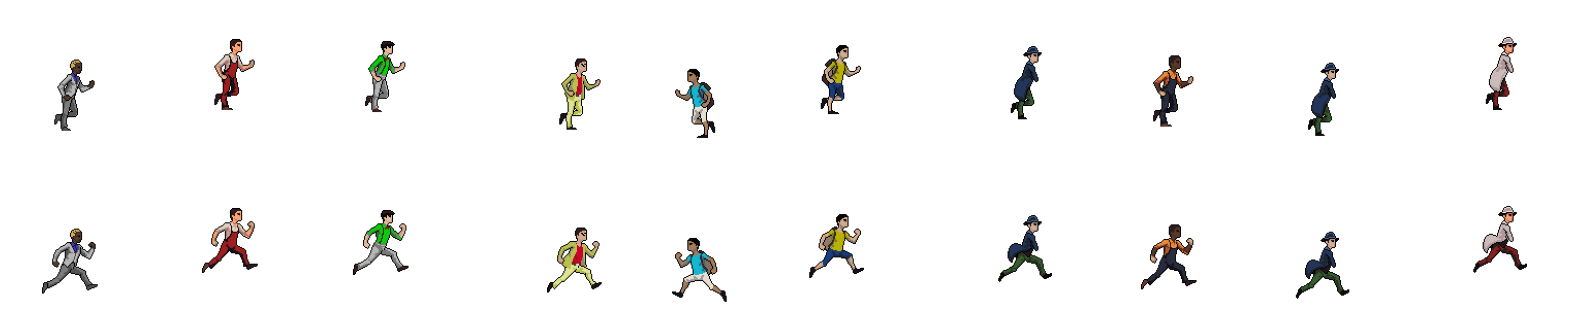

In [5]:
# 원본 이미지 및 재구성 이미지 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(128, 128, 4), cmap="gray")
    plt.axis("off")

    # 재구성 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_train[i].reshape(128, 128,4 ), cmap="gray")
    plt.axis("off")
plt.show()

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
# 모델 학습from tensorflow.keras.callbacks import EarlyStopping
# 얼리 스토핑 콜백 설정
early_stopping = EarlyStopping(
    monitor='val_loss',     # 검토할 메트릭 ('val_loss'도 사용 가능)
    patience=10,         # 성능 개선 없이 기다릴 에포크 수
    restore_best_weights=True  # 최상의 가중치를 복원할지 여부
)

# 예시 데이터셋: x_train은 입력 이미지, y_train은 분할 마스크
unet.fit(x_train, y_train, epochs=2000, batch_size=16, shuffle=True,  validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.4031 - loss: 0.0570 - val_accuracy: 0.1207 - val_loss: 0.0297
Epoch 2/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 210ms/step - accuracy: 0.1191 - loss: 0.0331 - val_accuracy: 0.0723 - val_loss: 0.0281
Epoch 3/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.0938 - loss: 0.0280 - val_accuracy: 0.0710 - val_loss: 0.0265
Epoch 4/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.0805 - loss: 0.0347 - val_accuracy: 0.0700 - val_loss: 0.0133
Epoch 5/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 211ms/step - accuracy: 0.0841 - loss: 0.0143 - val_accuracy: 0.1033 - val_loss: 0.0103
Epoch 6/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.1885 - loss: 0.0114 - val_accuracy: 0.8218 - val_loss: 0.0122
Epoch 7/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 216ms/step - accuracy: 0.8341 - loss: 0.0105 - val_accuracy: 0.6892 - val_loss: 0.0086
Epoch 8/2000
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.8125 - loss: 0.0088 - v

In [8]:
decoded_imgs = unet.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


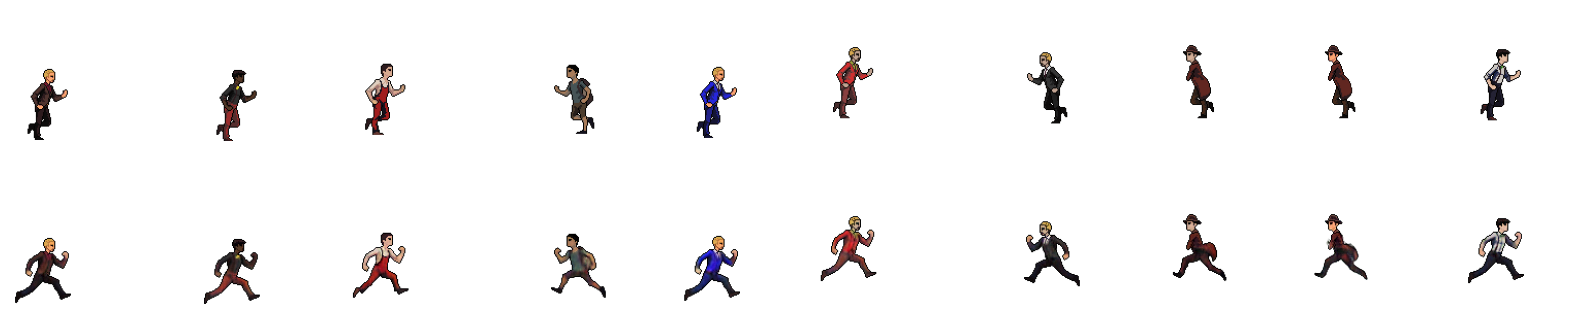

In [9]:
# 원본 이미지 및 재구성 이미지 시각화
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(128, 128, 4), cmap="gray")
    plt.axis("off")

    # 재구성 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128,4 ), cmap="gray")
    plt.axis("off")
plt.show()